# Training a Linear Regression Model
Name: Mahnoor

### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mounting Google Drive

In [26]:
# Open drive and load training data csv  file
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### Loading train and test data files from Google drive

In [28]:
train_data = pd.read_csv('/drive/My Drive/Machine_learning/train.csv')
train_data.head(10)

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
5,36,32.463875
6,12,10.780897
7,81,80.763399
8,25,24.612151
9,5,6.963319


In [29]:
test_data = pd.read_csv('/drive/My Drive/Machine_learning/test.csv')
test_data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


### Convert pandas dataframes into numpy arrays 

In [74]:
train_data_array = train_data.to_numpy()
test_data_array = test_data.to_numpy()
trainingDataSize = train_data_array.shape
print("Shape of train data:",train_data_array.shape)
print("Shape of test data: ",test_data_array.shape)

Shape of train data: (699, 2)
Shape of test data:  (300, 2)


##Training the model
Using normal equation method to compute the optimal parameters for linear regression


In [39]:
m = trainingDataSize[0]
X=train_data_array[:,0:1]
Y=train_data_array[:,1:2]
Xi_Yi=np.multiply(X,Y)

In [40]:
theta0, theta1 = np.matmul(np.linalg.inv([[m,np.sum(X)],[np.sum(X),np.sum(np.square(X))]]) , [np.sum(Y), np.sum(Xi_Yi)])

In [68]:
print("theta0: ", theta0)
print("theta1: ", theta1)

theta0:  -0.10726546430100825
theta1:  1.0006563818563046


##Testing the model
Predicting output (y`) for test dataset using the optimal parameters computed

In [42]:
predictedOutput = theta0 + theta1*test_data_array[:,0:1]

### Error using mean squared error function

In [70]:
Cost=( np.sum(np.square(predictedOutput-test_data_array[:,1:2])) ) / (2*test_data_array.shape[0])
print("Mean square error:", Cost)

Mean square error: 4.7164610960196445


## Accuracy using r2 score

In [71]:
#extra 
from sklearn.metrics import r2_score
print('R2 Score:',r2_score(test_data_array[:,0:1],predictedOutput))

R2 Score: 0.999992837632062


## Visualization
### Plotting the actual and predicted answers



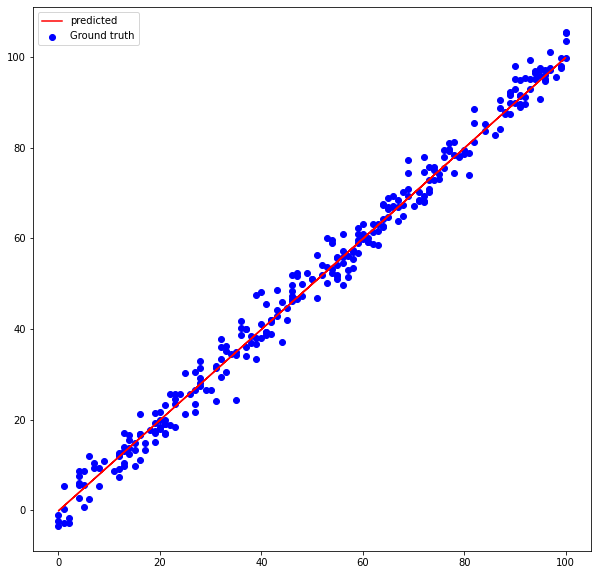

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(test_data_array[:,0:1], test_data_array[:,1:2],color='blue',label = 'Ground truth')
plt.plot(test_data_array[:,0:1], predictedOutput,color='red',label = 'predicted')
plt.legend()
plt.show()